<a href="https://colab.research.google.com/github/vignesh1166/Portfolio-Optimization-and-risk-management./blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyportfolioopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
pip install QuantStats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 728.4 kB/s eta 0:00:00


In [ ]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29089 sha256=b6d155131f1b9116ab1aeff2d70b445ff04af75c327f51dd404703f2eb202197
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


In [ ]:
#data handling and statistical analysis
import pandas as pd
import numpy as np
from pandas_datareader import data
from scipy import stats

#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Financial data
import quantstats as qs
import ta
import yfinance as yf

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime and hiding warnings
import datetime as dt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
Federal_Bank = qs.utils.download_returns('FEDERALBNK.NS')
Federal_Bank = Federal_Bank.loc['2010-01-01':'2023-08-31']

HDFC_bank = qs.utils.download_returns('HDFCBANK.NS')
HDFC_bank = HDFC_bank.loc['2010-01-01':'2023-08-31']

IDFC_bank = qs.utils.download_returns('IDFCFIRSTB.NS')
IDFC_bank = IDFC_bank.loc['2015-12-01':'2023-08-31']

infosys = qs.utils.download_returns('INFY.NS')
infosys = infosys.loc['2010-01-01':'2023-08-31']

ITC = qs.utils.download_returns('ITC.NS')
ITC = ITC.loc['2010-01-01':'2023-08-31']

Stove_kraft = qs.utils.download_returns('STOVEKRAFT.NS')
Stove_kraft = Stove_kraft.loc['2021-08-01':'2023-08-31']

Karnataka_bank = qs.utils.download_returns('KTKBANK.NS')
Karnataka_bank = Karnataka_bank.loc['2010-01-01':'2023-08-31']

TMB = qs.utils.download_returns('TMB.NS')
TMB = TMB.loc['2022-11-01':'2023-08-31']

Tata_steel = qs.utils.download_returns('TATASTEEL.NS')
Tata_steel = Tata_steel.loc['2010-01-01':'2023-08-31']

Natco = qs.utils.download_returns('NATCOPHARM.NS')
Natco = Natco.loc['2010-01-01':'2023-08-31']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
Federal_Bank

Date
2010-01-04    0.001273
2010-01-05    0.014837
2010-01-06    0.019006
2010-01-07    0.007993
2010-01-08    0.008743
                ...   
2023-08-25    0.000000
2023-08-28    0.022743
2023-08-29    0.003822
2023-08-30   -0.007269
2023-08-31    0.003835
Name: Close, Length: 3374, dtype: float64

In [ ]:
Bank_nifty = qs.utils.download_returns('^NSEBANK')
Bank_nifty = Bank_nifty.loc['2010-01-01':'2023-08-31']

nifty = qs.utils.download_returns('^NSEI')
nifty = nifty.loc['2010-01-01':'2023-08-31']

fmgc_nifty = qs.utils.download_returns('^CNXFMCG')
fmgc_nifty = fmgc_nifty.loc['2010-01-01':'2023-08-31']

Metal_nifty = qs.utils.download_returns('^CNXMETAL')
Metal_nifty = Metal_nifty.loc['2010-01-01':'2023-08-31']

pharma_nifty = qs.utils.download_returns('^CNXPHARMA')
pharma_nifty = pharma_nifty.loc['2010-01-01':'2023-08-31']

nifty_it = qs.utils.download_returns('^CNXIT')
nifty_it = nifty_it.loc['2010-01-01':'2023-08-31']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Federal Bank and bank_nifty daily returns


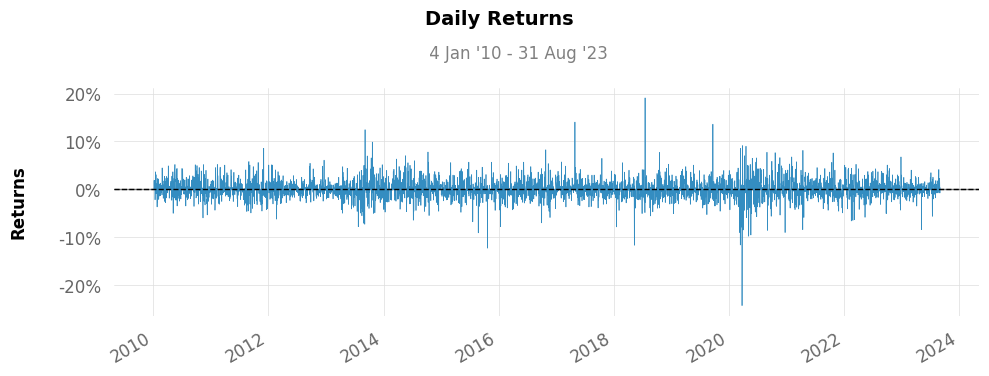

HDFC_bank and bank_nifty daily returns


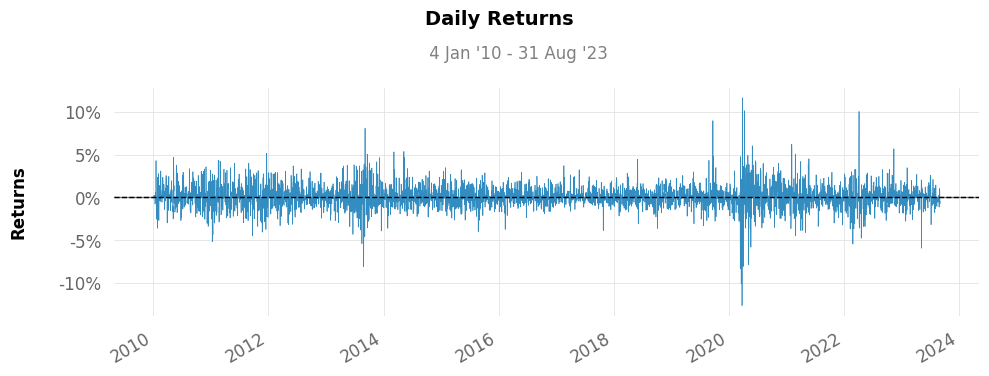

IDFC_bank and bank_nifty daily returns


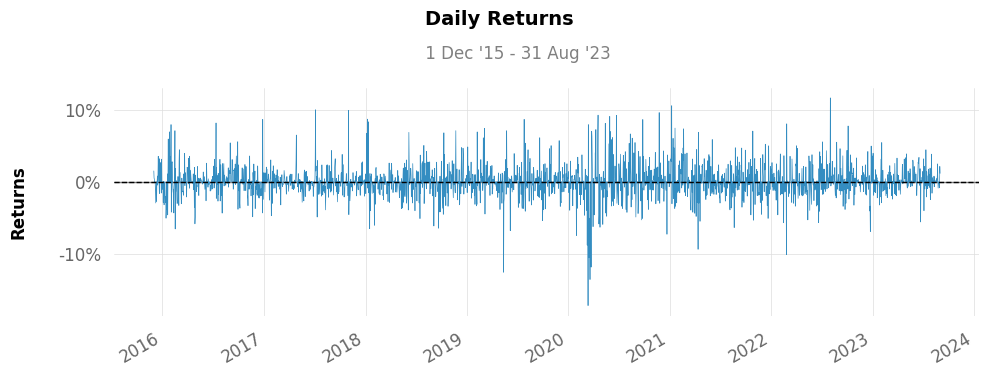

infosys and nifty_it daily returns


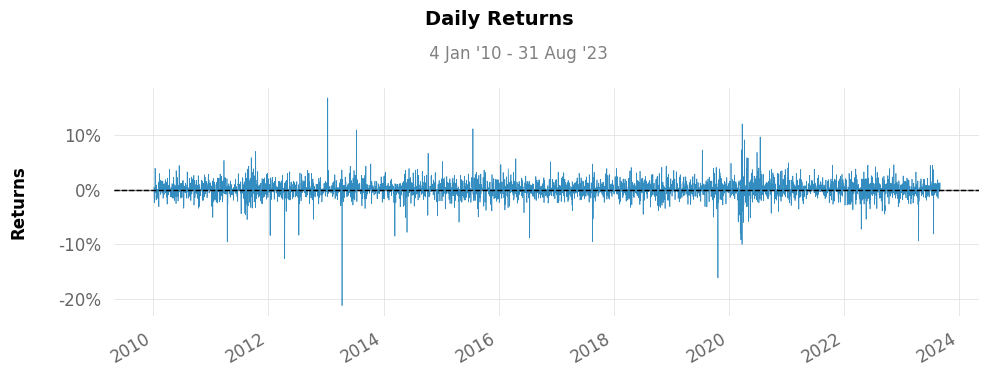

ITC and fmgc_nifty daily returns


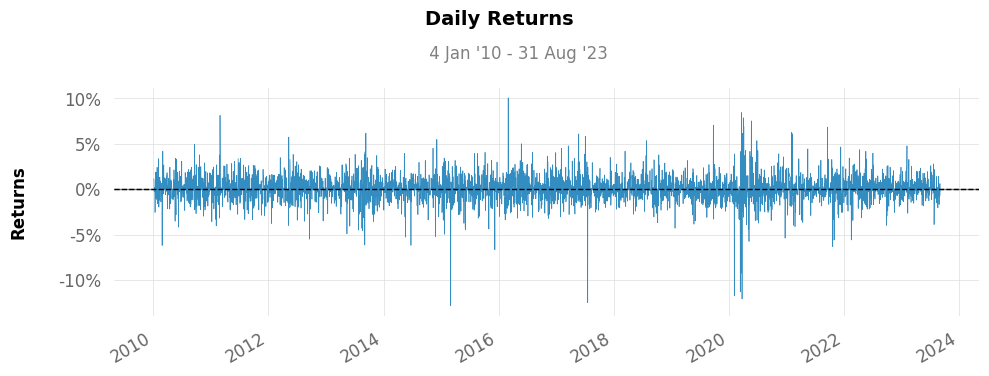

Karnataka_bank and bank_nifty daily returns


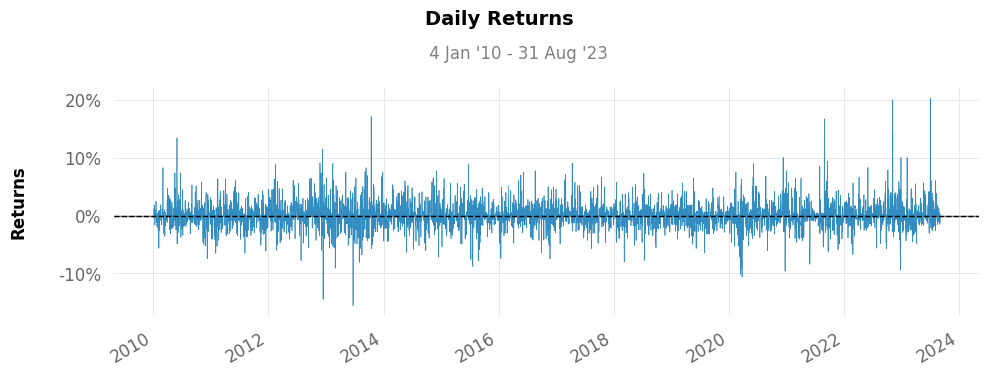

TMB and bank_nifty daily returns


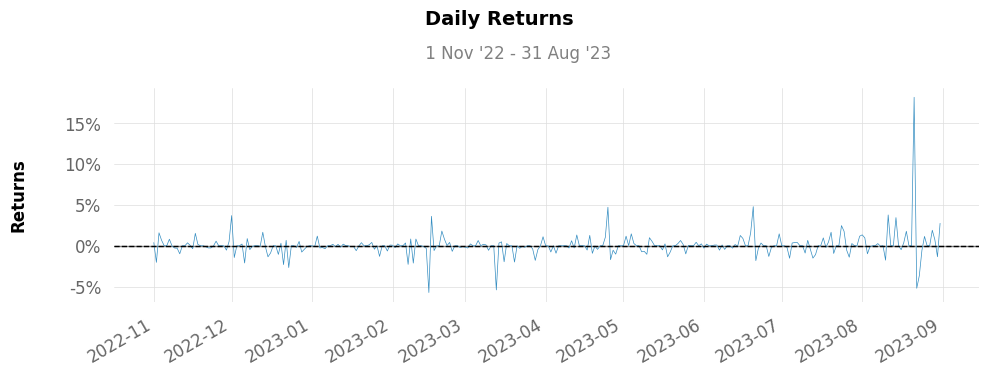

Tata_steel and Metal_nifty daily returns


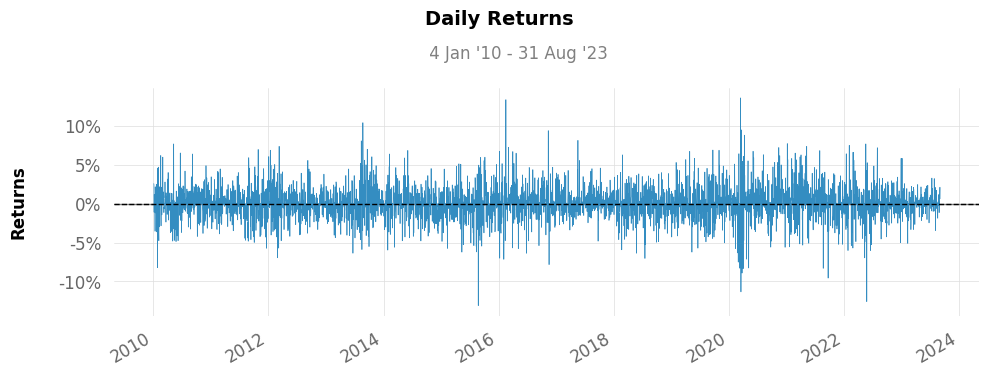

Natco and pharma_nifty daily returns


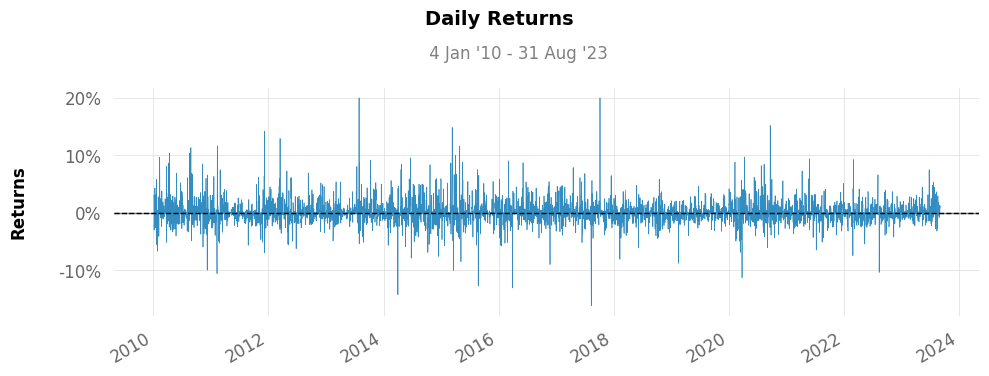

In [ ]:
compare = [
    (Federal_Bank, Bank_nifty, 'Federal Bank and bank_nifty daily returns'),
    (HDFC_bank, Bank_nifty, 'HDFC_bank and bank_nifty daily returns'),
    (IDFC_bank, Bank_nifty, 'IDFC_bank and bank_nifty daily returns'),
    (infosys, nifty_it, 'infosys and nifty_it daily returns'),
    (ITC, fmgc_nifty, 'ITC and fmgc_nifty daily returns'),
    (Karnataka_bank, Bank_nifty, 'Karnataka_bank and bank_nifty daily returns'),
    (TMB, Bank_nifty, 'TMB and bank_nifty daily returns'),
    (Tata_steel, Metal_nifty, 'Tata_steel and Metal_nifty daily returns'),
    (Natco, pharma_nifty, 'Natco and pharma_nifty daily returns')
]

for df1, df2, description in compare:
    print(description)
    qs.plots.daily_returns(df1, df2)


Federal Bank and Close returns


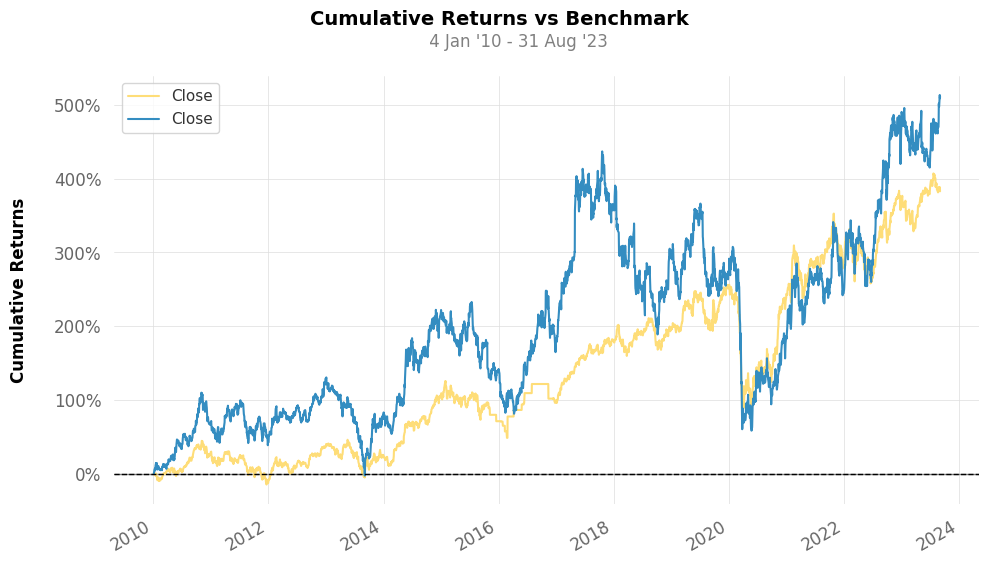

HDFC_bank and Close returns


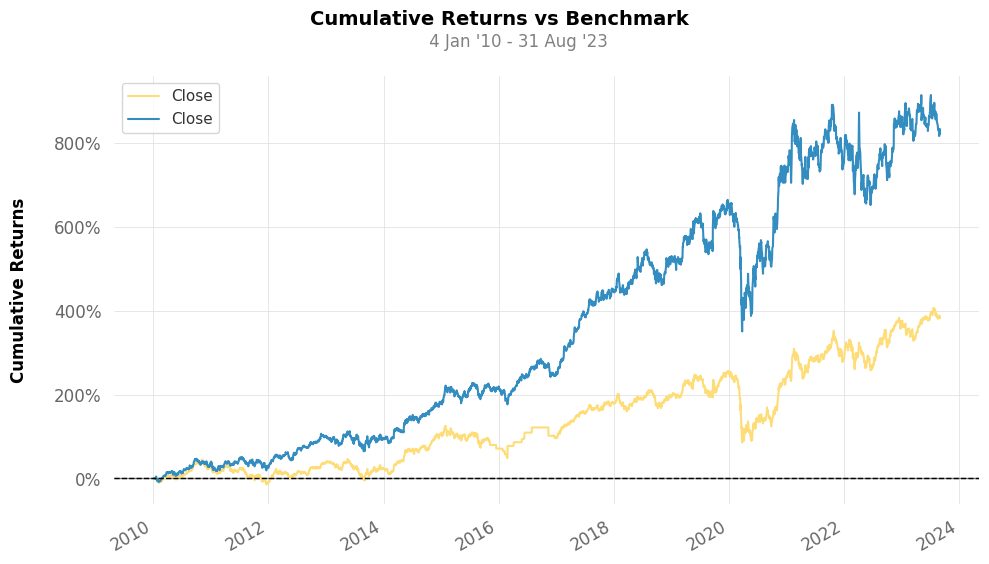

IDFC_bank and Close returns


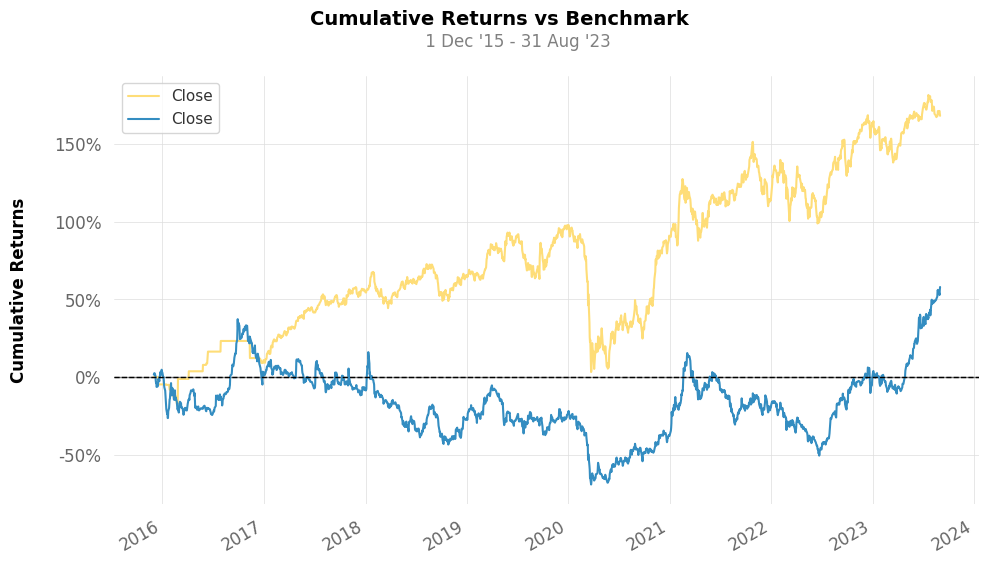

infosys and Close returns


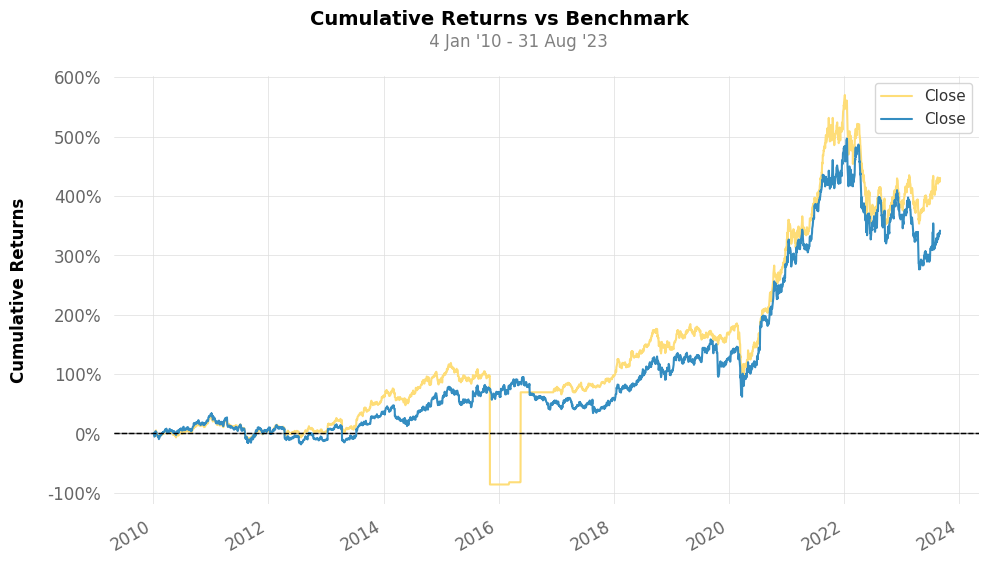

ITC and Close returns


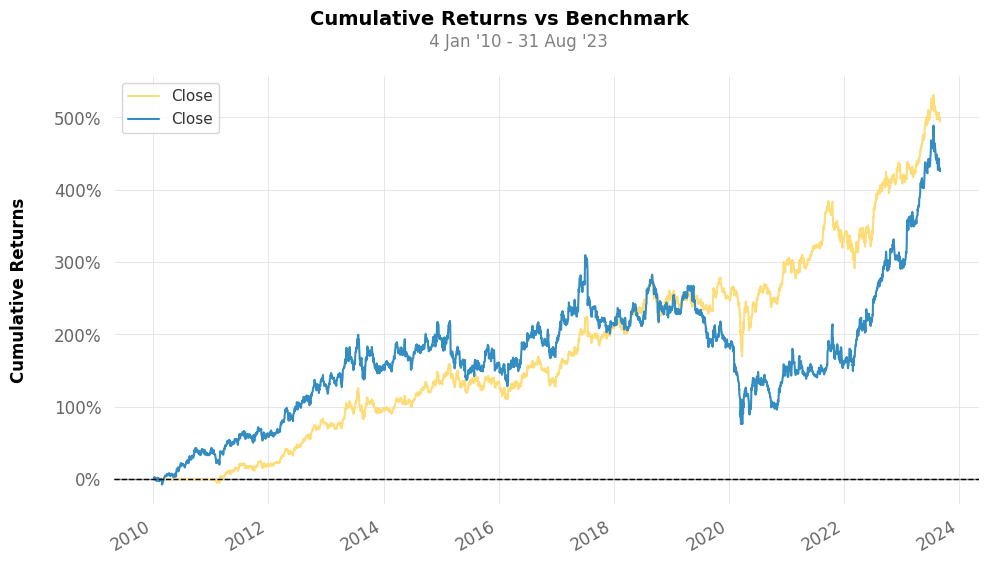

Stove_kraft and Close returns


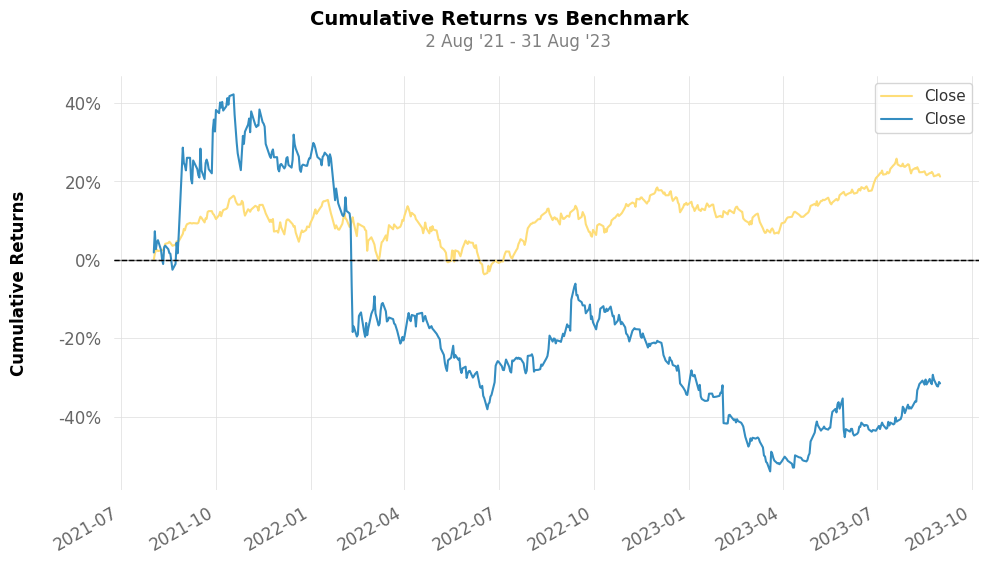

Karnataka_bank and Close returns


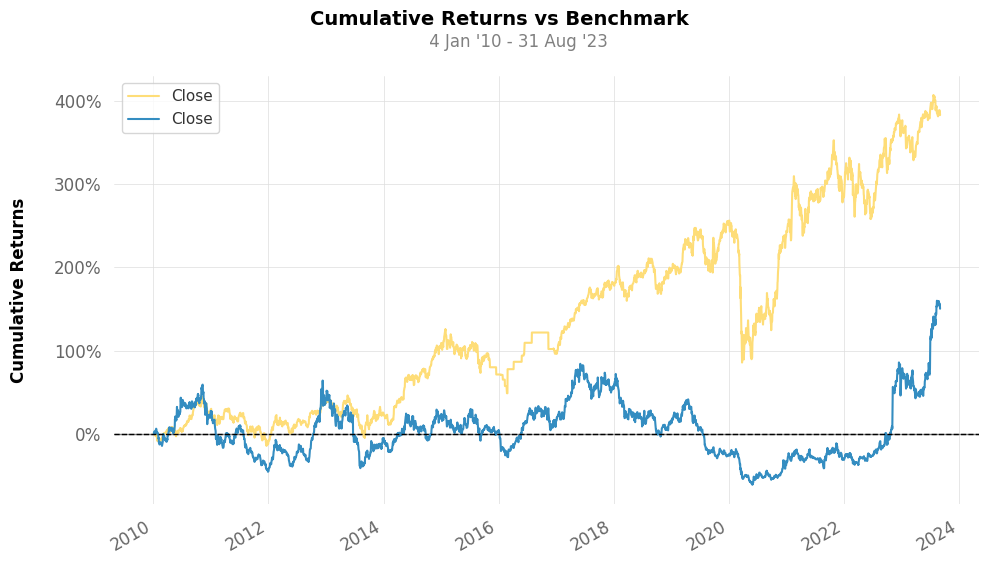

TMB and Close returns


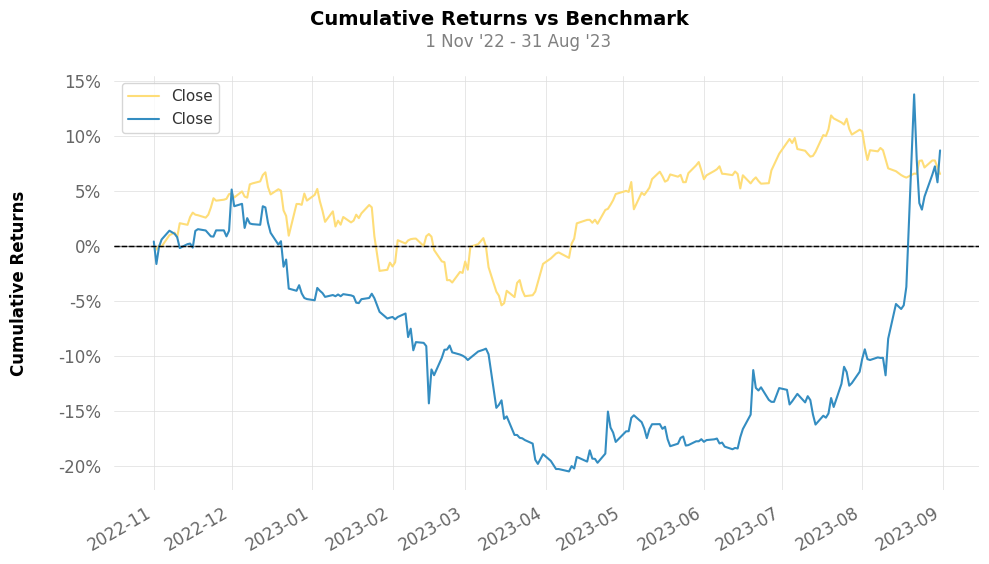

Tata_steel and Close returns


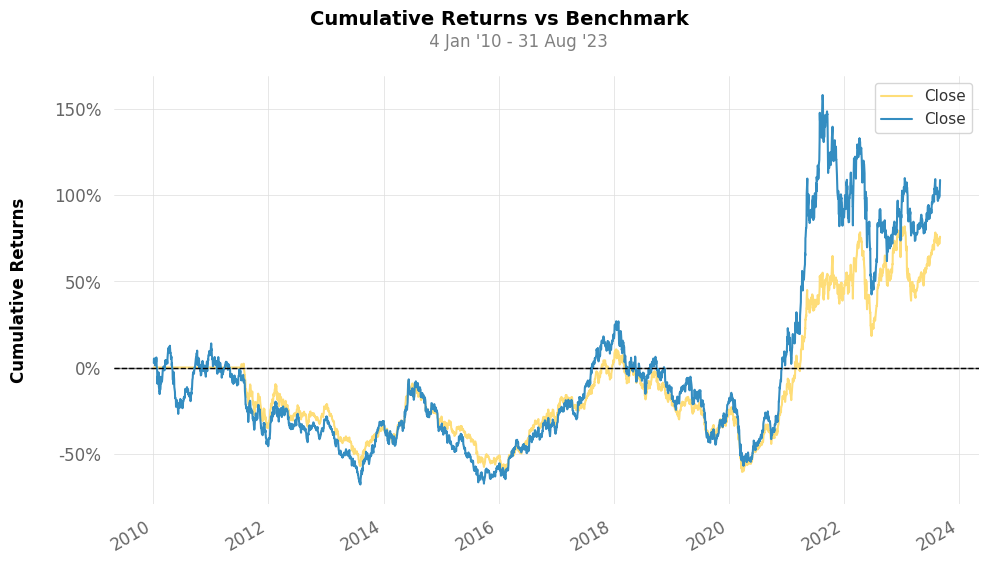

Natco and Close returns


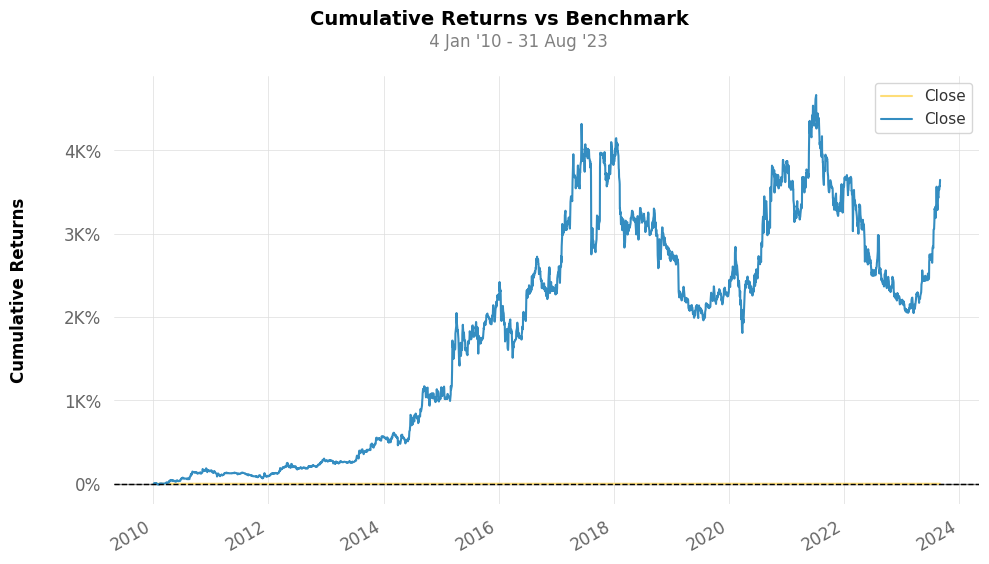

In [ ]:
asset_portfolio = [
    ('Federal Bank', Federal_Bank, Bank_nifty),
    ('HDFC_bank', HDFC_bank, Bank_nifty),
    ('IDFC_bank', IDFC_bank, Bank_nifty),
    ('infosys', infosys, nifty_it),
    ('ITC', ITC, fmgc_nifty),
    ('Stove_kraft', Stove_kraft, nifty),
    ('Karnataka_bank', Karnataka_bank, Bank_nifty),
    ('TMB', TMB, Bank_nifty),
    ('Tata_steel', Tata_steel, Metal_nifty),
    ('Natco', Natco, pharma_nifty)
]

for asset_name, asset, benchmark in asset_portfolio:
    print(f'{asset_name} and {benchmark.name} returns')
    qs.plots.returns(asset, benchmark)


Federal Bank


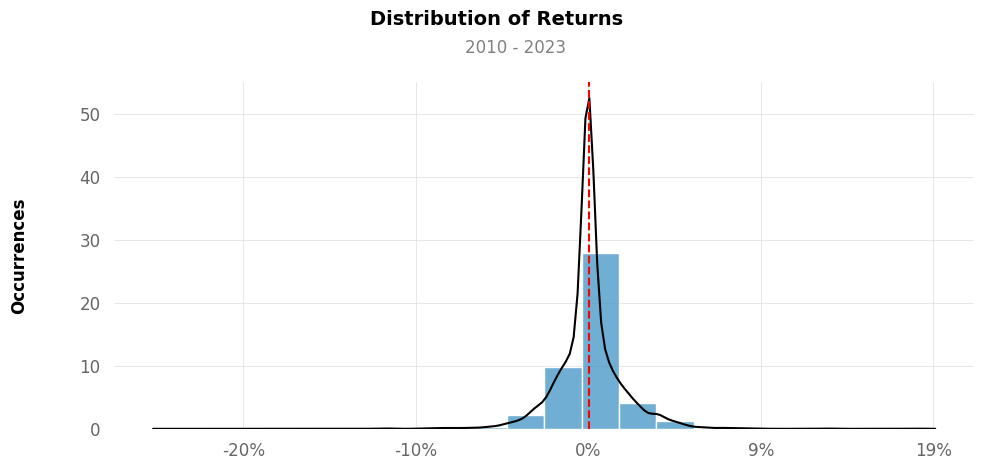

HDFC_bank


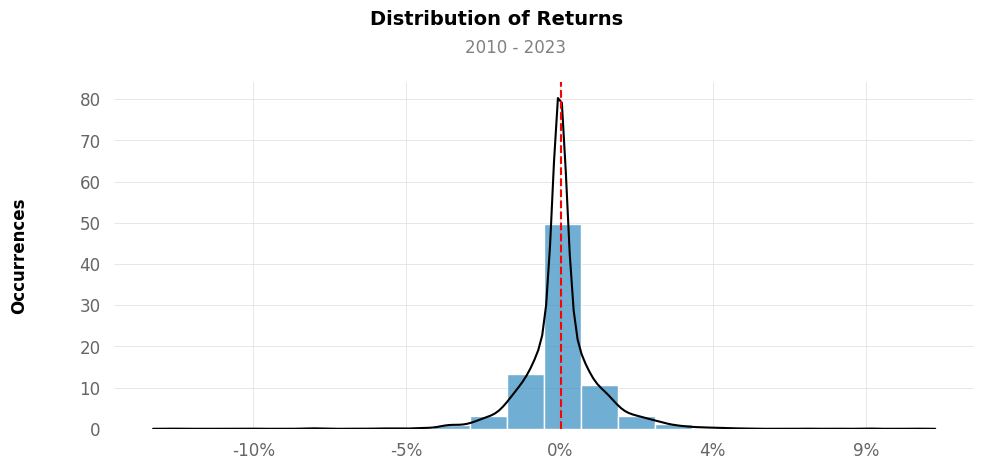

IDFC_bank


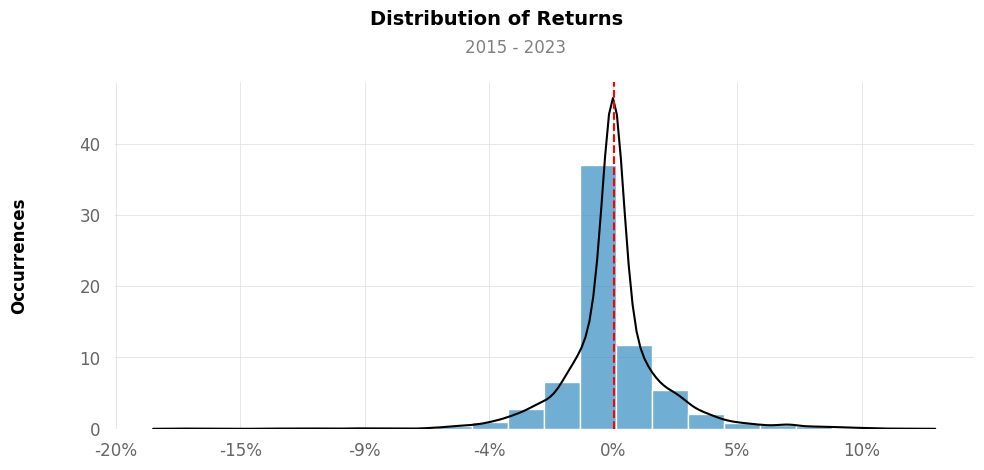

infosys


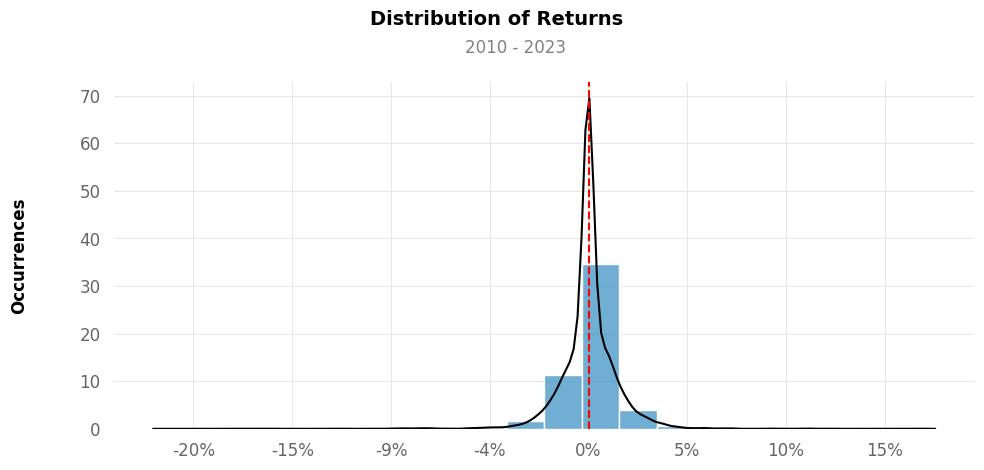

ITC


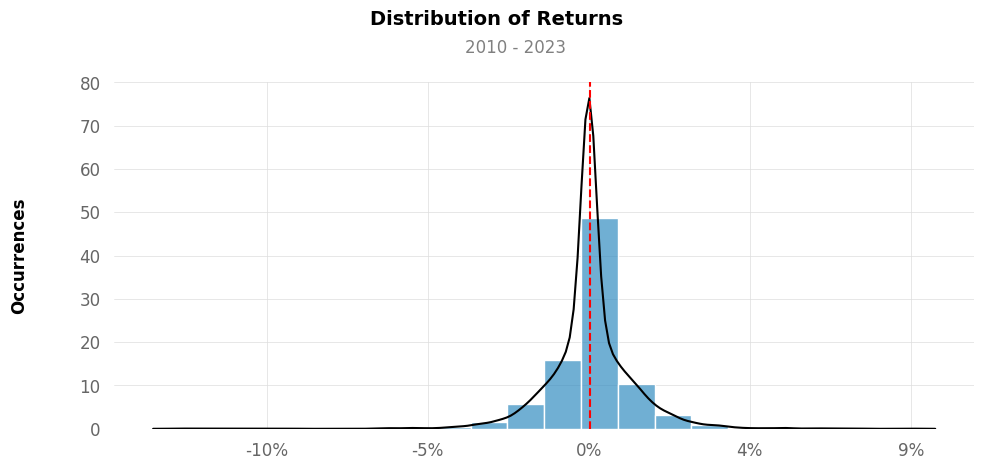

Stove_kraft


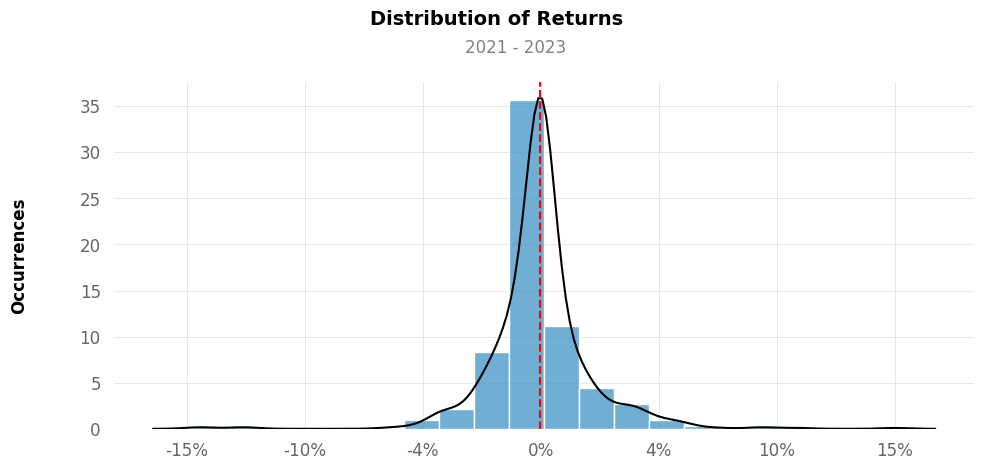

Karnataka_bank


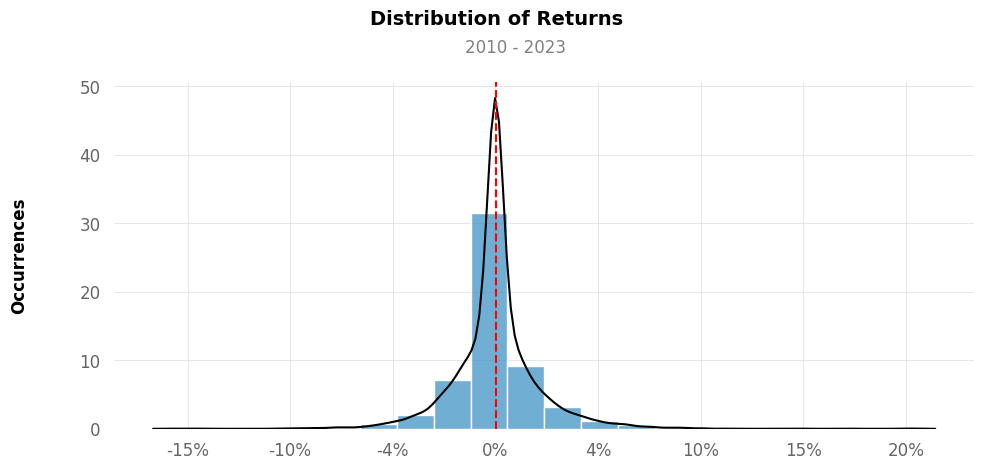

TMB


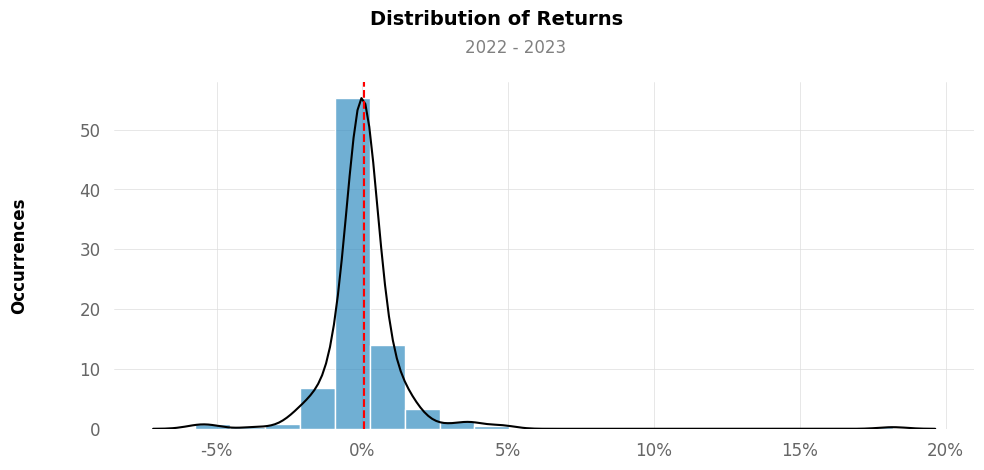

Tata_steel


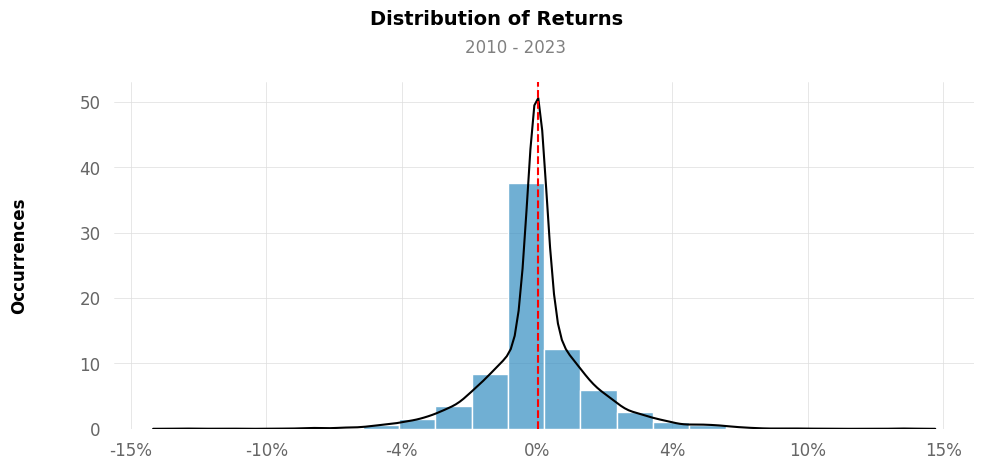

Natco


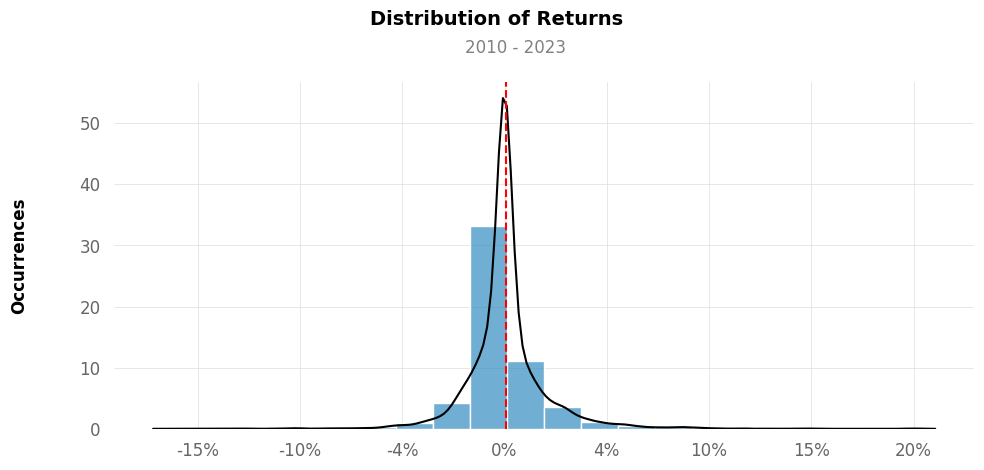

In [ ]:
assets = [
    ('Federal Bank', Federal_Bank),
    ('HDFC_bank', HDFC_bank),
    ('IDFC_bank', IDFC_bank),
    ('infosys', infosys),
    ('ITC', ITC),
    ('Stove_kraft', Stove_kraft),
    ('Karnataka_bank', Karnataka_bank),
    ('TMB', TMB),
    ('Tata_steel', Tata_steel),
    ('Natco', Natco)
]

for asset_name, asset in assets:
    print(f'{asset_name}')
    qs.plots.histogram(asset, resample='D')


From the histograms, we can observe that most of the daily returns are close to zero in the centre of the distribution. But there are extreme values that are spread out from mean foer example TMB bank, with daily return around 20% indicating the presence of outlier in the positive range and negative field or negative returns of 5%.

Other stocks like HDFC Bank, ITC, Tata steel, stove craft, Karnataka Bank and Infosys are more stable with weighing equal on both the. tails.

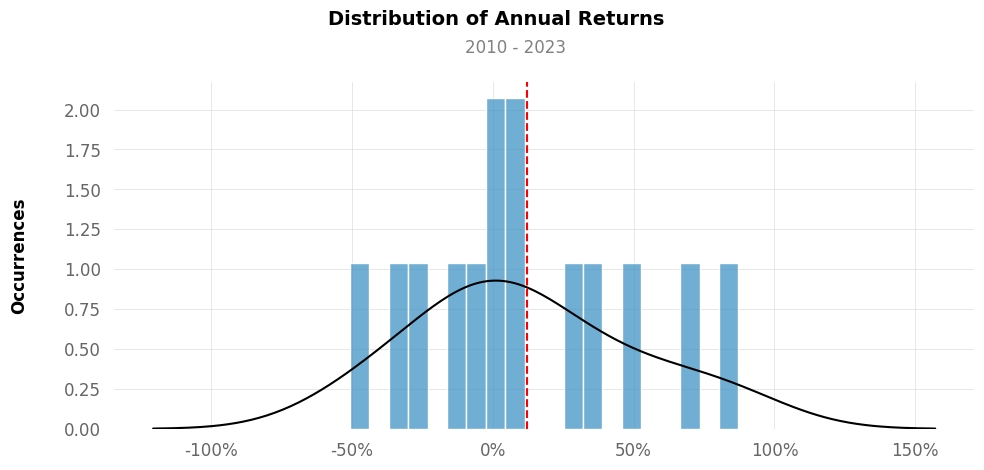

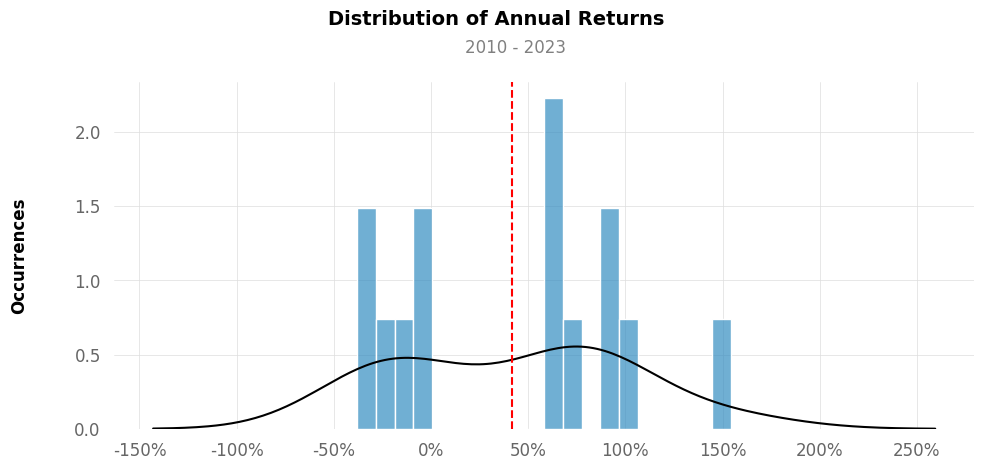

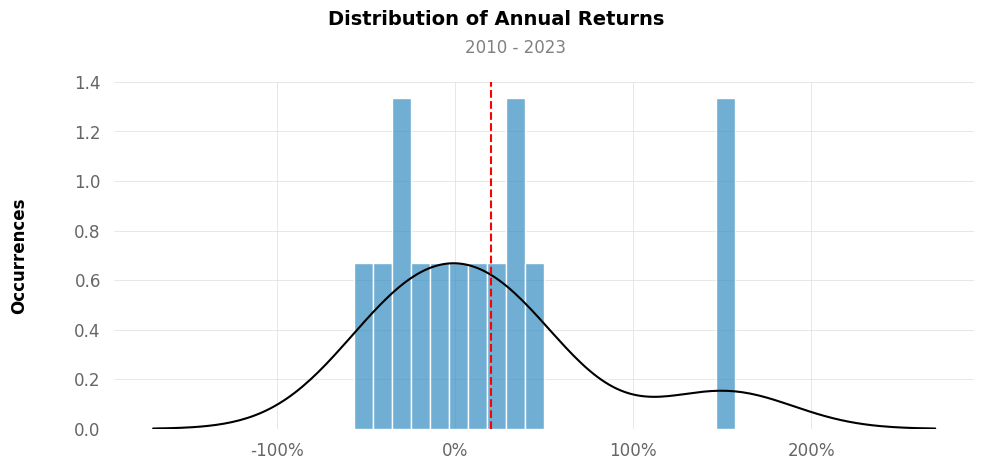

In [ ]:
#Annual Returns of Tata steel, natco Pharma and Karnataka bank
qs.plots.histogram(Tata_steel, resample='A')
qs.plots.histogram(Natco,resample='A')
qs.plots.histogram(Karnataka_bank,resample='A')


In [ ]:
#Measuring Kurtosis to assess the risk
assets = [
    ('Federal Bank', Federal_Bank),
    ('HDFC Bank', HDFC_bank),
    ('IDFC Bank', IDFC_bank),
    ('Infosys', infosys),
    ('ITC', ITC),
    ('Stove Kraft', Stove_kraft),
    ('Karnataka Bank', Karnataka_bank),
    ('TMB', TMB),
    ('Tata Steel', Tata_steel),
    ('Natco', Natco)
]

for asset_name, asset in assets:
    kurtosis = qs.stats.kurtosis(asset).round(2)
    print(f'{asset_name} kurtosis: {kurtosis}\n')

Federal Bank kurtosis: 7.7

HDFC Bank kurtosis: 6.81

IDFC Bank kurtosis: 4.25

Infosys kurtosis: 16.62

ITC kurtosis: 7.48

Stove Kraft kurtosis: 7.45

Karnataka Bank kurtosis: 5.89

TMB kurtosis: 46.93

Tata Steel kurtosis: 2.32

Natco kurtosis: 8.42



Kurtosis is a metric that assesses the level of price volatility risk associated with an investment. It quantifies the degree of price fluctuations an investment typically encounters. A high kurtosis in the distribution of returns suggests that the investment is prone to occasional extreme price fluctuations. In simpler terms, a high kurtosis indicates that the investment is likely to produce infrequent but substantial gains or significant losses.

The kurtosis values for these financial assets indicate the shape of their return distributions compared to a normal distribution. Federal Bank, HDFC Bank, ITC, Stove Kraft, Karnataka Bank, and Natco exhibit leptokurtic distributions, characterized by heavier tails and sharper peaks, suggesting a higher likelihood of extreme returns. IDFC Bank also leans towards leptokurtosis but to a slightly lesser degree. Infosys displays an exceptionally high kurtosis, indicating a distribution with extremely heavy tails and an extraordinarily sharp peak, signifying significant tail risk. Tata Steel, on the other hand, has a platykurtic distribution, suggesting a flatter peak and lighter tails, implying less likelihood of extreme returns. TMB stands out with an extremely high kurtosis, suggesting substantial risk in the form of extreme returns, both positive and negative.



In [ ]:
#Measuring Skewness
assets = [
    ('Federal Bank', Federal_Bank),
    ('HDFC Bank', HDFC_bank),
    ('IDFC Bank', IDFC_bank),
    ('Infosys', infosys),
    ('ITC', ITC),
    ('Stove Kraft', Stove_kraft),
    ('Karnataka Bank', Karnataka_bank),
    ('TMB', TMB),
    ('Tata Steel', Tata_steel),
    ('Natco', Natco)
]

for asset_name, asset in assets:
    skewness = qs.stats.skew(asset).round(2)
    print(f'{asset_name} Skewness: {skewness}\n')

Federal Bank Skewness: -0.07

HDFC Bank Skewness: 0.1

IDFC Bank Skewness: 0.07

Infosys Skewness: -0.7

ITC Skewness: -0.41

Stove Kraft Skewness: -0.15

Karnataka Bank Skewness: 0.6

TMB Skewness: 4.55

Tata Steel Skewness: 0.08

Natco Skewness: 0.8



Federal Bank, Infosys, ITC, and Stove Kraft have negatively skewed distributions (skewness < 0). It implies that these assets may have a higher probability of positive returns but with occasional negative outliers.

Karnataka Bank and Natco have positively skewed distributions (skewness > 0).These assets may have a higher likelihood of negative returns with occasional positive outliers.

HDFC Bank, IDFC Bank, and Tata Steel have skewness values close to zero. This suggests that their return distributions are approximately symmetrical, with returns evenly distributed around the mean. These assets may exhibit a more balanced risk-return profile.

TMB stands out with an extremely high positive skewness of 4.55.This suggests a significant concentration of returns on the left side of the mean, indicating a higher probability of negative returns and potential positive outliers.

In [ ]:
#Measuring Satandard deviation
assets = [
    ('Federal Bank', Federal_Bank),
    ('HDFC Bank', HDFC_bank),
    ('IDFC Bank', IDFC_bank),
    ('Infosys', infosys),
    ('ITC', ITC),
    ('Stove Kraft', Stove_kraft),
    ('Karnataka Bank', Karnataka_bank),
    ('TMB', TMB),
    ('Tata Steel', Tata_steel),
    ('Natco', Natco)
]

for asset_name, asset in assets:
    std_deviation = asset.std().round(4)
    print(f'{asset_name} SD: {std_deviation}\n')



Federal Bank SD: 0.0228

HDFC Bank SD: 0.0148

IDFC Bank SD: 0.0247

Infosys SD: 0.0174

ITC SD: 0.0159

Stove Kraft SD: 0.0263

Karnataka Bank SD: 0.0252

TMB SD: 0.0183

Tata Steel SD: 0.0233

Natco SD: 0.0236



 HDFC Bank (0.0148) and ITC (0.0159) have relatively low standard deviations, indicating lower daily return variability.

 Infosys (0.0174), TMB (0.0183), Tata Steel (0.0233), and Natco (0.0236) have moderate standard deviations, suggesting a moderate level of daily return variability.

 Federal Bank (0.0228), IDFC Bank (0.0247), Stove Kraft (0.0263), and Karnataka Bank (0.0252) have high standard deviations, indicating higher daily return variability.

 The values represent how it is clustered around mean

In [ ]:
#Combining daily returns in a dataframe
merge_df = pd.concat([Federal_Bank, HDFC_bank,infosys,ITC,Karnataka_bank,Tata_steel,Natco], join = 'outer', axis = 1)
merge_df.columns = ['Federal_Bank', 'HDFC_bank','infosys','ITC','Karnataka_bank','Tata_steel','Natco']
merge_df

Federal_Bank  HDFC_bank   infosys       ITC  Karnataka_bank  \
Date                                                                      
2010-01-04      0.001273   0.002027  0.004421  0.011364        0.011614   
2010-01-05      0.014837   0.000879  0.003349  0.009856       -0.004210   
2010-01-06      0.019006   0.000674 -0.014592  0.002342       -0.000384   
2010-01-07      0.007993   0.002605 -0.022473 -0.003116        0.018070   
2010-01-08      0.008743   0.001314 -0.024099  0.002149        0.004154   
...                  ...        ...       ...       ...             ...   
2023-08-25      0.000000  -0.011271 -0.002459 -0.016744       -0.007916   
2023-08-28      0.022743   0.010407 -0.003134 -0.004398        0.004876   
2023-08-29      0.003822   0.007954  0.001413 -0.002945       -0.014998   
2023-08-30     -0.007269  -0.007294  0.012344  0.006135        0.002911   
2023-08-31      0.003835  -0.004592  0.000209 -0.007001       -0.012726   

            Tata_steel     Natco  
Date                              
2010-01-04    0.025984  0.031160  
2010-01-05    0.024221  0.021471  
2010-01-06   -0.010861 -0.029973  
2010-01-07    0.012071 -0.012038  
2010-01-08   -0.002078  0.004062  
...                ...       ...  
2023-08-25   -0.011416 -0.008299  
2023-08-28    0.005988  0.013005  
2023-08-29    0.016582 -0.000893  
2023-08-30    0.021330  0.012402  
2023-08-31    0.006552  0.008332  

[3374 rows x 7 columns]

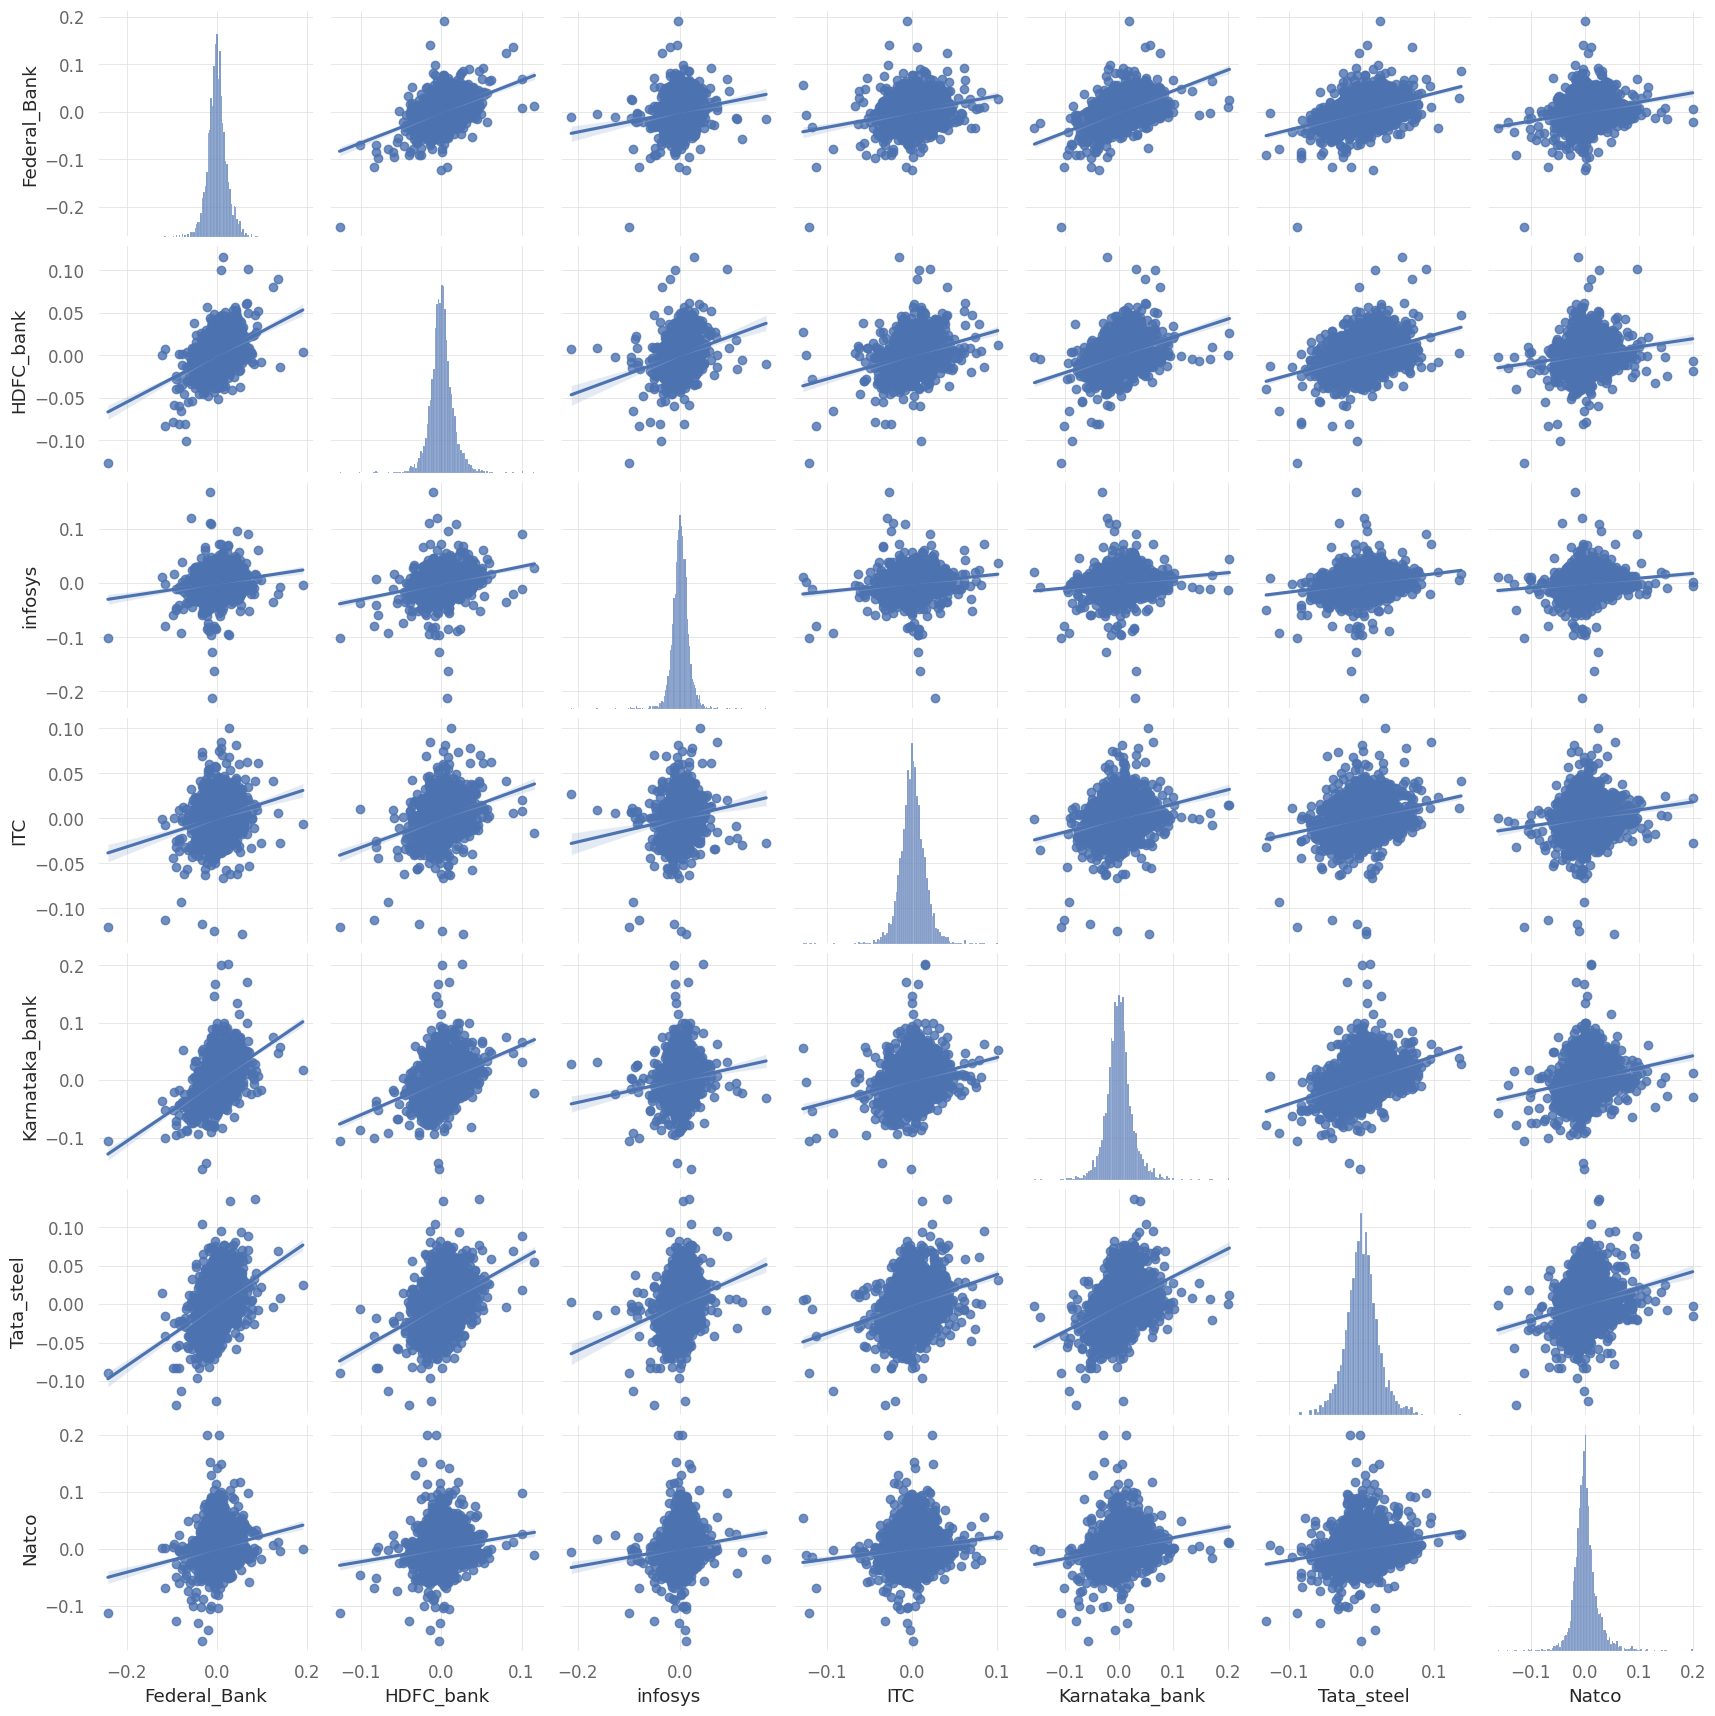

In [ ]:
#pairplots to understand the relationship
sns.pairplot(merge_df, kind = 'reg')
plt.show()


<Axes: >

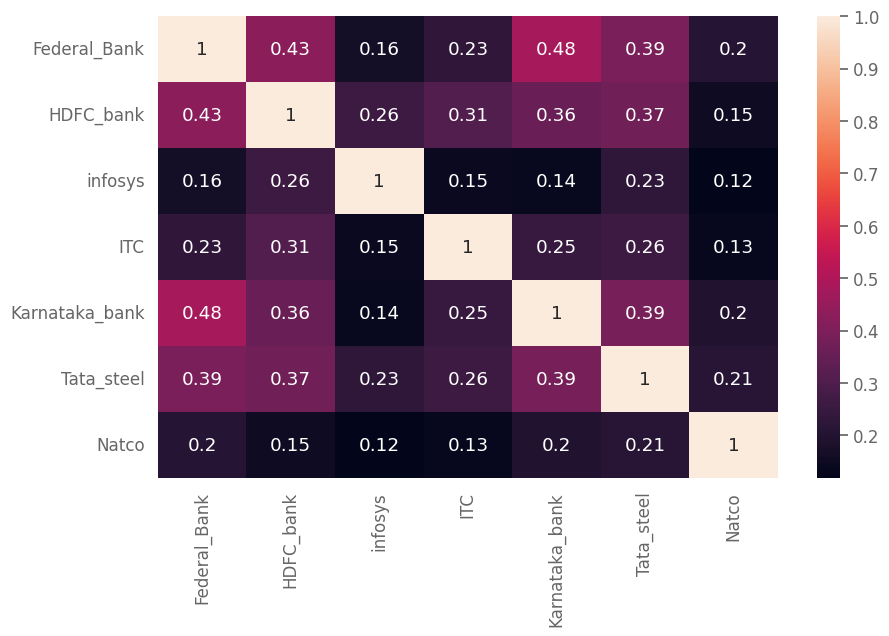

In [ ]:
correlation = merge_df.corr()
sns.heatmap(correlation, annot = True)

In [ ]:
merge_df2 = pd.concat([Bank_nifty, nifty,fmgc_nifty,Metal_nifty,pharma_nifty,nifty_it], join = 'outer', axis = 1)
merge_df2.columns = ['Bank_nifty', 'nifty','fmgc_nifty','Metal_nifty','pharma_nifty','nifty_it']
merge_df2

Bank_nifty     nifty  fmgc_nifty  Metal_nifty  pharma_nifty  \
Date                                                                      
2010-01-04    0.009175  0.005989         NaN          NaN           NaN   
2010-01-05    0.008757  0.008734         NaN          NaN           NaN   
2010-01-06    0.003356  0.000739         NaN          NaN           NaN   
2010-01-07   -0.003258 -0.003540         NaN          NaN           NaN   
2010-01-08   -0.003508 -0.003487         NaN          NaN           NaN   
...                ...       ...         ...          ...           ...   
2023-08-25   -0.005950 -0.006236   -0.010184    -0.012646           NaN   
2023-08-28    0.005950  0.002089   -0.002252     0.002140           NaN   
2023-08-29    0.000014  0.001896   -0.003264     0.012765           NaN   
2023-08-30   -0.005903  0.000248    0.005671     0.009234           NaN   
2023-08-31   -0.005504 -0.004840   -0.008171    -0.002763           NaN   

            nifty_it  
Date                  
2010-01-04  0.010114  
2010-01-05  0.006193  
2010-01-06 -0.015008  
2010-01-07 -0.020953  
2010-01-08 -0.016650  
...              ...  
2023-08-25 -0.006351  
2023-08-28 -0.004559  
2023-08-29  0.003004  
2023-08-30  0.007706  
2023-08-31  0.001961  

[3370 rows x 6 columns]

In [ ]:
#Checking the Correlation of Banking stocks wrt Bank Nifty
corr_fed = merge_df['Federal_Bank'].corr(merge_df2['Bank_nifty'])
corr_hdfc = merge_df['HDFC_bank'].corr(merge_df2['Bank_nifty'])
corr_kar = merge_df['Karnataka_bank'].corr(merge_df2['Bank_nifty'])
print(f'The correlation for Fedral Bank is {corr_fed}, HDFC Bank is {corr_hdfc}, Karnataka Bank is {corr_kar} with respective to Bank nifty')

The correlation for Fedral Bank is 0.6102237875019131, HDFC Bank is 0.7652017163125824, Karnataka Bank is 0.49922995287985905 with respective to Bank nifty


In [ ]:
#Checking the Correlation of Infy wrt IT Index
corr_infy = merge_df['infosys'].corr(merge_df2['nifty_it'])
print(f'The correlation for Infosys is {corr_infy} with respective to nifty IT')

The correlation for Infosys is 0.06724543782125425 with respective to nifty IT


In [ ]:
#Checking the Correlation of ITC wrt FMGC Index
corr_ITC = merge_df['ITC'].corr(merge_df2['fmgc_nifty'])
print(f'The correlation for ITC is {corr_ITC} with respective to nifty FMGC')

The correlation for ITC is 0.8339284148717256 with respective to nifty FMGC


In [ ]:
#Checking the Correlation of Tata Steel wrt metal Index
corr_Tata = merge_df['Tata_steel'].corr(merge_df2['Metal_nifty'])
print(f'The correlation for Tata steel is {corr_Tata} with respective to Metal Index')

The correlation for Tata steel is 0.8602933882037519 with respective to Metal Index


Federal Bank (0.6102), HDFC Bank (0.7652), Karnataka Bank (0.4992) exhibit positive correlations with Bank Nifty, indicating a significant degree of alignment in their daily return movements with the broader banking sector represented by Bank Nifty.

Karnataka Bank also has a positive correlation with Bank Nifty, but it's slightly lower than HDFC Bank, implying a somewhat lesser degree of alignment.

Infosys (0.0672)  has a low positive correlation with the Nifty IT index.

ITC (0.8339) displays a high positive correlation with the Nifty FMCG index.  ITC's performance is significantly influenced by the FMCG sector.

Tata Steel (0.8603) has a high positive correlation with the Metal Index. Tata Steel's returns are closely tied to the metal industry.

Correlation helps assess the risk associated with individual assets and the potential impact of broader market movements on those assets.

Checking the Alpha and beta value

In [ ]:
#Removing Index
nifty_no_index = nifty.reset_index(drop = True)
Bank_nifty_no_index = Bank_nifty.reset_index(drop=True)
HDFC_no_index = HDFC_bank.reset_index(drop = True)
Tata_no_index = Tata_steel.reset_index(drop = True)
ITC_no_index = ITC.reset_index(drop = True)
Fed_no_index = Federal_Bank.reset_index(drop = True)
infy_no_index = infosys.reset_index(drop = True)



In [ ]:
#Extracting Beta and Alpha using Linear regression
X = nifty_no_index.values[:3354].reshape(-1, 1)
y = HDFC_no_index.values[:3354].reshape(-1, 1)

lr = LinearRegression().fit(X,y)

beta = lr.coef_[0]
alpha = lr.intercept_

print('HDFC Beta Value: ', beta.round(3))
print('HDFC Alpha value: ', alpha.round(3))

HDFC Beta Value:  [0.106]
HDFC Alpha value:  [0.001]


In [ ]:
X = nifty_no_index.values[:3354].reshape(-1, 1)
y = Tata_no_index.values[:3354].reshape(-1, 1)

lr = LinearRegression().fit(X,y)

beta = lr.coef_[0]
alpha = lr.intercept_

print('Tata Steel Beta Value: ', beta.round(3))
print('Tata Steel Alpha value: ', alpha.round(4))

Tata Steel Beta Value:  [0.193]
Tata Steel Alpha value:  [0.0004]


In [ ]:
X = nifty_no_index.values[:3354].reshape(-1, 1)
y = ITC_no_index.values[:3354].reshape(-1, 1)

lr = LinearRegression().fit(X,y)

beta = lr.coef_[0]
alpha = lr.intercept_

print('ITC Beta Value: ', beta.round(3))
print('ITC Alpha value: ', alpha.round(4))

ITC Beta Value:  [0.097]
ITC Alpha value:  [0.0006]


In [ ]:
X = nifty_no_index.values[:3354].reshape(-1, 1)
y = infy_no_index.values[:3354].reshape(-1, 1)

lr = LinearRegression().fit(X,y)

beta = lr.coef_[0]
alpha = lr.intercept_

print('Infy Beta Value: ', beta.round(3))
print('Infy Alpha value: ', alpha.round(4))

Infy Beta Value:  [0.058]
Infy Alpha value:  [0.0006]


In [ ]:
X = Bank_nifty_no_index.values[:3083].reshape(-1, 1)
y = Fed_no_index.values[:3083].reshape(-1, 1)

lr = LinearRegression().fit(X,y)

beta = lr.coef_[0]
alpha = lr.intercept_

print('Federal Bank Beta Value: ', beta.round(3))
print('Federal Bank Alpha value: ', alpha.round(4))

Federal Bank Beta Value:  [0.119]
Federal Bank Alpha value:  [0.0006]


The Alpha Value for these stocks - HDFC, Tata Steel, ITC, Infosys, and Federal Bank are close to zero, indicating that they have roughly achieved the expected returns based on their beta value. This suggests that these assets have performed in line with market expectations, given their level of risk.

A beta less than 1 indicates lower volatility, while a beta greater than 1 suggests higher volatility. All the assets have beta values less than 1, which indicates that they are less volatile than the market. This means that these assets tend to have lower price fluctuations compared to the broader market.

Beta value close to zero like Infosys with a beta of (0.058) suggest that the asset is not strongly correlated with the market, while beta values slightly above zero (like Federal Bank with a beta of 0.119) indicate a modest correlation with market movements.

In [ ]:
#Conducting Shapiro test
Assets = [('Federal_Bank', Federal_Bank), ('HDFC_bank', HDFC_bank), ('infosys', infosys), ('ITC', ITC), ('Tata_steel', Tata_steel)]

for name, asset in Assets:
    sharpe_ratio = qs.stats.sharpe(asset).round(4)
    print(f'Sharpe Ratio for {name}: {sharpe_ratio}\n')

Sharpe Ratio for Federal_Bank: 0.5548

Sharpe Ratio for HDFC_bank: 0.8238

Sharpe Ratio for infosys: 0.5412

Sharpe Ratio for ITC: 0.6186

Sharpe Ratio for Tata_steel: 0.3335



The Sharpe ratio indicates how well an equity investment performs in comparison to the rate of return on a risk-free investment, such as G-sec government bonds or yellow metal.

Federal Bank has a Sharpe Ratio of 0.5548, indicating that it has generated a reasonable level of risk-adjusted return.

HDFC Bank's has a Sharpe Ratio of 0.8238, this suggests that HDFC Bank has delivered a higher risk-adjusted return, making it an attractive investment in terms of risk-reward trade-off.

Infosys has a Sharpe Ratio of 0.5412, indicating that it has provided a reasonable risk-adjusted return.

ITC's Sharpe Ratio of 0.6186, indicating that it has delivered a higher risk-adjusted return.

Tata Steel's Sharpe Ratio of 0.3335 is the lowest among the assets listed. This suggests that it has provided a lower risk-adjusted return compared to the other assets.


In [ ]:
weights = [0.25, 0.25, 0.25, 0.25, 0.25] # Defining weights for each stock
portfolio = Federal_Bank*weights[0] + HDFC_bank*weights[1] + infosys*weights[2] + ITC*weights[3] + Tata_steel*weights[4] # Creating portfolio multiplying each stock for its respective weight
portfolio # Displaying portfolio's daily returns

Date
2010-01-04    0.011267
2010-01-05    0.013286
2010-01-06   -0.000858
2010-01-07   -0.000730
2010-01-08   -0.003493
                ...   
2023-08-25   -0.010473
2023-08-28    0.007902
2023-08-29    0.006706
2023-08-30    0.006311
2023-08-31   -0.000249
Name: Close, Length: 3374, dtype: float64

[Performance Metrics]



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-01-05   2010-01-05
End Period                 2023-08-31   2023-08-31
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          267.99%      934.92%
CAGR﹪                     6.81%        12.54%

Sharpe                     0.66         0.83
Prob. Sharpe Ratio         99.1%        99.86%
Smart Sharpe               0.66         0.83
Sortino                    0.92         1.17
Smart Sortino              0.92         1.17
Sortino/√2                 0.65         0.83
Smart Sortino/√2           0.65         0.83
Omega                      1.16         1.16

Max Drawdown               -38.44%      -52.06%
Longest DD Days            1087         590
Volatility (ann.)          17.03%       24.59%
R^2                        0.76         0.76
Information Ratio          0.05         0.05
Calmar            

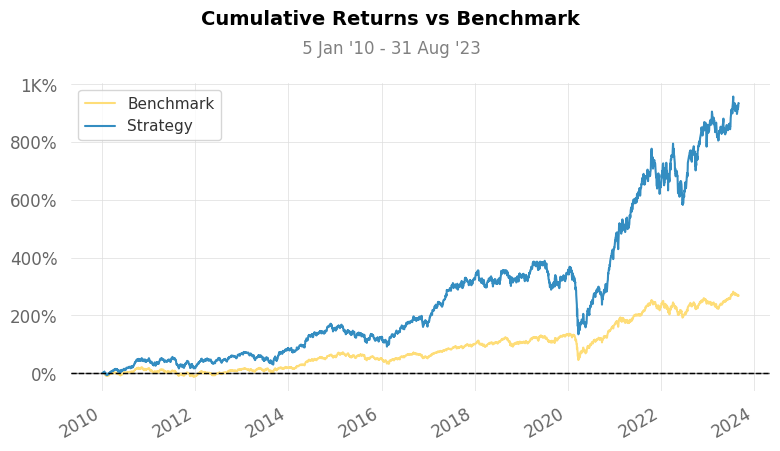

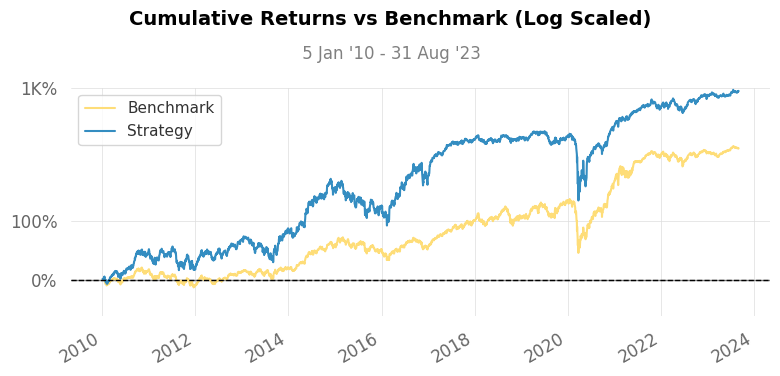

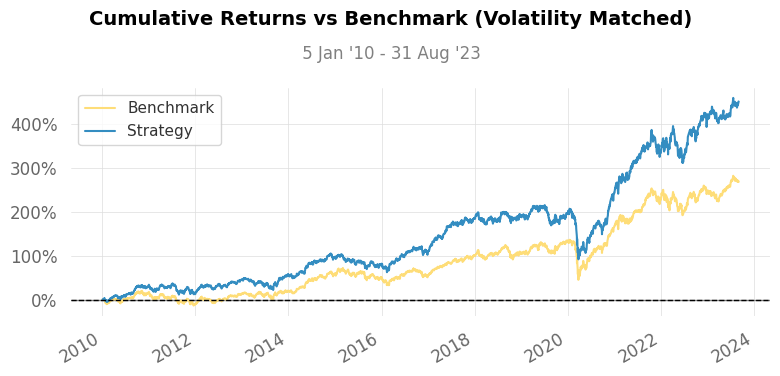

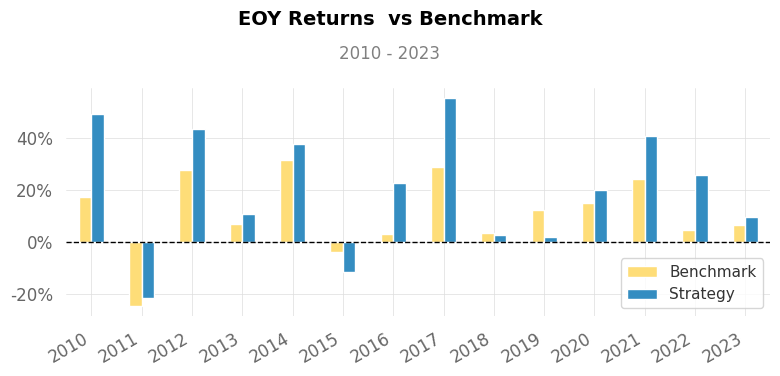

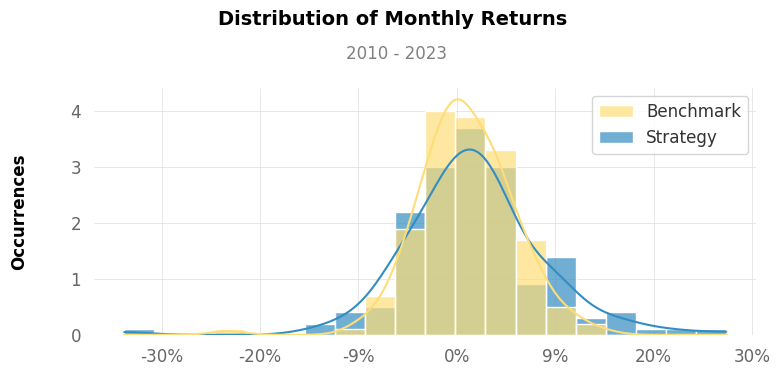

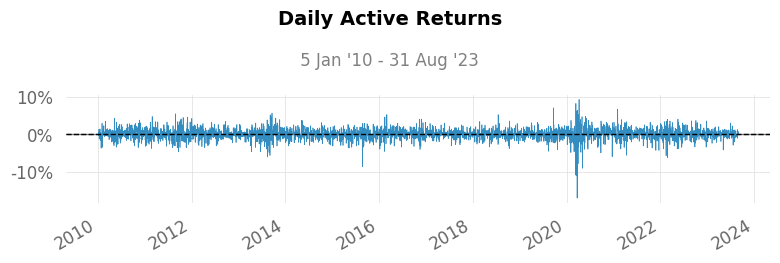

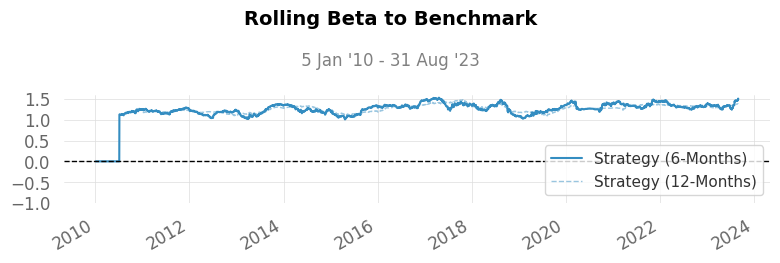

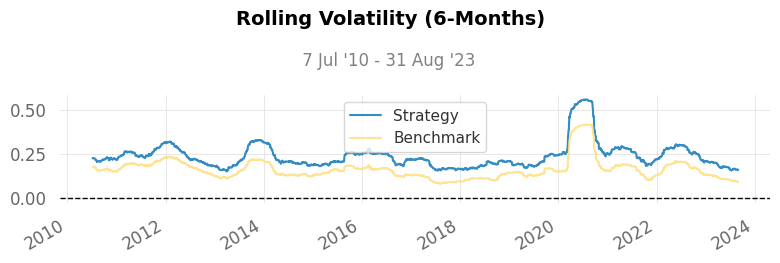

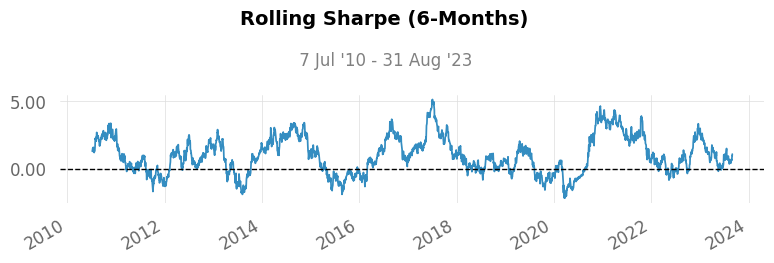

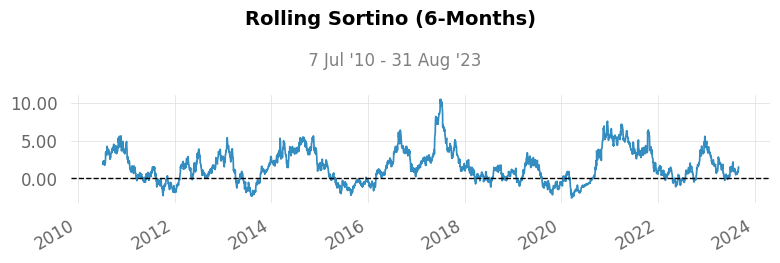

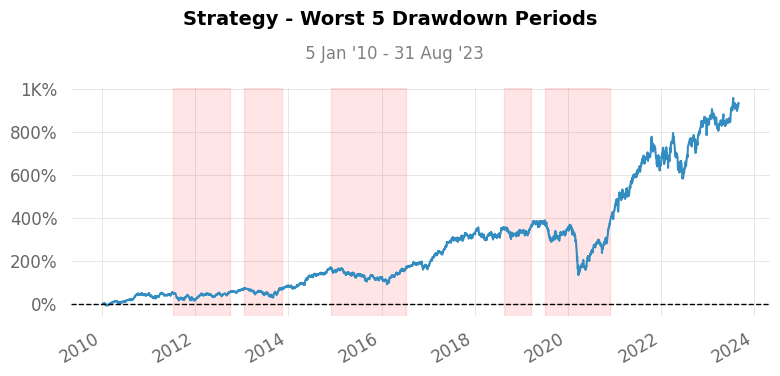

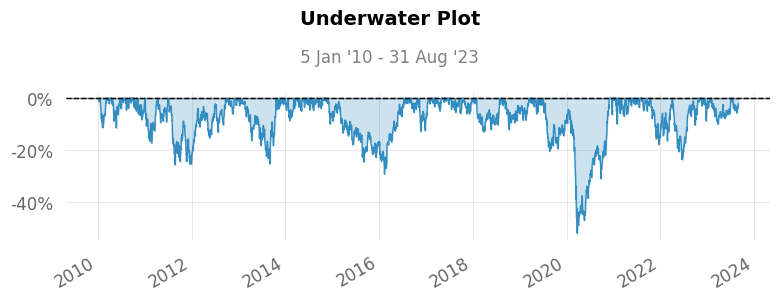

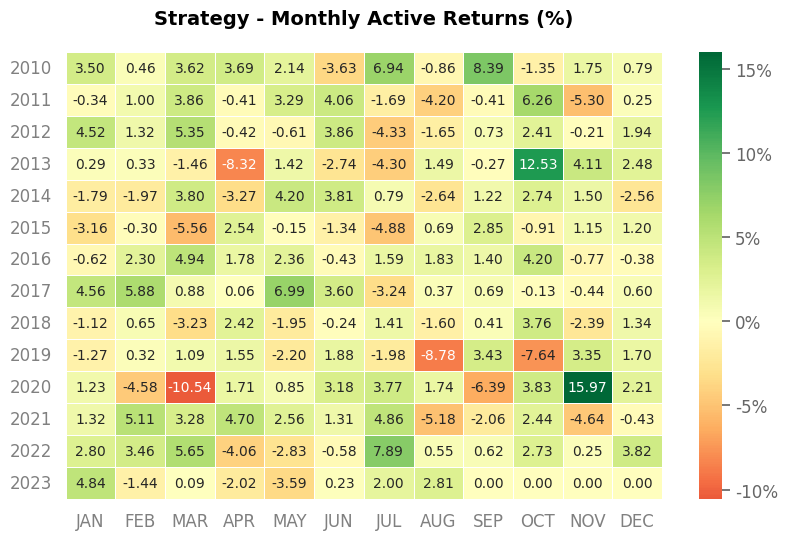

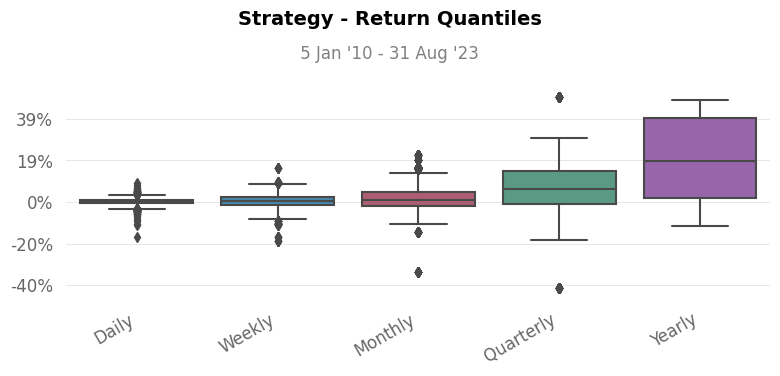

In [ ]:
import yfinance as yf
NSE = yf.Ticker('^NSEI')
qs.reports.full(portfolio, benchmark = nifty)

The cumulative return for Nifty is 267.99% whereas the cumulative return for the strategy is 934.92%, indicating a significantly higher return compared to the benchmark.

The annual growth rate for the benchmark is 6.81% and for strategy is 12.54% which is better than other fixed instrumens. Also every year our strategy has beaten the index and inflation assuming it to be as 6%-7%.

The maximum drawdown for benchmark is -38.44%. This is the largest percentage drop in value from a previous peak to a trough whereas the strategy has a maximum drawdown of -52.06%, indicating a deeper decline during the worst period. But the recovery factor for strategy is at 5.27 compared to benchmark which is 3.9,indicating a higher multiple of recovery compared to the benchmark.

The expected yearly return for benchmark is 9.75% and strategy is 18.17%, indicating potentially higher returns.

Sortino for benchmark is 0.92, a measure of downside risk-adjusted return. The strategy's Sortino is 1.17, indicating better downside risk-adjusted performance compared to the benchmark.

In [ ]:
# Getting dataframes info for Stocks using yfinance
HDFC_bank_df = yf.download('HDFCBANK.NS', start = '2010-01-01', end = '2023-08-31')
Federal_Bank_df = yf.download('FEDERALBNK.NS', start = '2010-01-01', end = '2023-08-31')
infosys_df = yf.download('INFY.NS', start = '2010-01-01', end = '2023-08-31')
ITC_df = yf.download('ITC.NS', start = '2010-01-01', end = '2023-08-31')
Tata_steel_df = yf.download('TATASTEEL.NS', start = '2010-01-01', end = '2023-08-31')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Extracting Adjusted Close for each stock
HDFC_bank_df=HDFC_bank_df['Adj Close']
Federal_Bank_df=Federal_Bank_df['Adj Close']
infosys_df=infosys_df['Adj Close']
ITC_df=ITC_df['Adj Close']
Tata_steel_df = Tata_steel_df['Adj Close']

In [ ]:
#Merging and Creating an Adj close for each stock
df = pd.concat([HDFC_bank_df, Federal_Bank_df, infosys_df, ITC_df,Tata_steel_df], join = 'outer', axis = 1)
df.columns = ['HDFC_Bank', 'Federal_Bank', 'Infosys', 'ITC','Tata_steel']
df # Visualizing dataframe for input

HDFC_Bank  Federal_Bank      Infosys         ITC  Tata_steel
Date                                                                      
2010-01-04   153.989594     19.499510   240.314377   60.988262   19.719269
2010-01-05   154.125000     19.788816   241.119247   61.589355   20.196890
2010-01-06   154.228806     20.164927   237.600845   61.733631   19.977524
2010-01-07   154.630539     20.326109   232.261307   61.541267   20.218666
2010-01-08   154.833664     20.503830   226.664062   61.673504   20.176664
...                 ...           ...          ...         ...         ...
2023-08-24  1579.300049    140.699997  1423.599976  450.899994  118.250000
2023-08-25  1561.500000    140.699997  1420.099976  443.350006  116.900002
2023-08-28  1577.750000    143.899994  1415.650024  441.399994  117.599998
2023-08-29  1590.300049    144.449997  1417.650024  440.100006  119.550003
2023-08-30  1578.699951    143.399994  1435.150024  442.799988  122.099998

[3373 rows x 5 columns]

Performing portfolio optimization using Markowitz Mean-Variance Optimization Model.

In [ ]:
# Calculating the annualized expected returns and the annualized sample covariance matrix
mean = expected_returns.mean_historical_return(df) #expected returns
Sample = risk_models.sample_cov(df) #Covariance matrix

In [ ]:
mean

HDFC_Bank       0.189983
Federal_Bank    0.160802
Infosys         0.142883
ITC             0.159691
Tata_steel      0.145976
dtype: float64

Calculating Expected Returns and Covariance for the input in portfolio optimization. These two key requirements for mean-variance optimization.

In [ ]:
Sample

HDFC_Bank  Federal_Bank   Infosys       ITC  Tata_steel
HDFC_Bank      0.055241      0.036406  0.016891  0.018180    0.030861
Federal_Bank   0.036406      0.131433  0.016635  0.021009    0.050845
Infosys        0.016891      0.016635  0.075885  0.010304    0.021573
ITC            0.018180      0.021009  0.010304  0.062883    0.023895
Tata_steel     0.030861      0.050845  0.021573  0.023895    0.211781

The EfficientFrontier class in the PyPortfolioOpt library is a powerful tool for portfolio optimization in Python. It is specifically designed to help investors and analysts build efficient portfolios by maximizing returns for a given level of risk or minimizing risk for a given level of return.

The primary goal of the EfficientFrontier class is to facilitate mean-variance optimization. It allows you to find the optimal allocation of assets in a portfolio that balances the trade-off between expected returns and risk (measured as variance or standard deviation).

In [ ]:
# Optimizing for maximal Sharpe ratio
efficient_frontier = EfficientFrontier(mean, Sample) # Providing expected returns and covariance matrix as input
weights = efficient_frontier.max_sharpe() # Optimizing weights for Sharpe ratio maximization

clean_weights = efficient_frontier.clean_weights() # clean_weights rounds the weights and clips near-zeros

# Printing optimized weights and expected performance for portfolio
clean_weights

OrderedDict([('HDFC_Bank', 0.48823),
             ('Federal_Bank', 0.02266),
             ('Infosys', 0.19332),
             ('ITC', 0.2958),
             ('Tata_steel', 0.0)])

These weights suggest the allocation in portfolio to achieve the maximum Sharpe ratio. In this case, it indicates that:

Allocate approximately 48.82% in portfolio to HDFC Bank.
Allocate about 2.27% to Federal Bank.
Allocate around 19.33% to Infosys.
Allocate roughly 29.58% to ITC.
Do not allocate any weight (0%) to Tata Steel.

The most probable reason for not including Tata steel in allocation : The covariance of 0.211781 between Tata_Steel and itself indicates that Tata Steel has a relatively large variance, and it contributes significantly to the portfolio's overall risk.

These optimized weights act as a guideline to construct any portfolio based on the Sharpe ratio optimization. This allocation aims to maximize the portfolio's risk-adjusted return, taking into account the expected returns and the covariance matrix of asset returns.